In [1]:
import pandas as pd

In [5]:
ml = pd.read_csv("mall_kmeans.csv")

In [6]:
ml.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
ml.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
ml.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [11]:
ml.Genre.replace({'Female':0,'Male':1},inplace=True)

In [14]:
ml.select_dtypes(include='object').columns

Index([], dtype='object')

In [15]:
from sklearn.cluster import KMeans

In [111]:
kmeans_ml = KMeans(n_clusters=5)

In [112]:
kmeans_ml.fit(ml)

KMeans(n_clusters=5)

In [113]:
kmeans_ml.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [114]:
set(kmeans_ml.labels_)

{0, 1, 2, 3, 4}

In [115]:
kmeans_ml.cluster_centers_

array([[ 92.53030303,   0.42424242,  42.72727273,  57.75757576,
         49.46969697],
       [164.        ,   0.52777778,  40.80555556,  87.91666667,
         17.88888889],
       [ 33.34285714,   0.37142857,  45.31428571,  31.8       ,
         30.31428571],
       [162.        ,   0.46153846,  32.69230769,  86.53846154,
         82.12820513],
       [ 25.16666667,   0.41666667,  25.83333333,  26.95833333,
         77.79166667]])

In [116]:
len(kmeans_ml.cluster_centers_)

5

In [117]:
centroid_df = pd.DataFrame(kmeans_ml.cluster_centers_)

In [118]:
centroid_df.columns = ml.columns

In [119]:
centroid_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,92.530303,0.424242,42.727273,57.757576,49.469697
1,164.000000,0.527778,40.805556,87.916667,17.888889
2,33.342857,0.371429,45.314286,31.800000,30.314286
3,162.000000,0.461538,32.692308,86.538462,82.128205
4,25.166667,0.416667,25.833333,26.958333,77.791667


In [120]:
kmeans_ml.score(ml)

-157141.33959373957

In [94]:
lst = []
for k in range(1,10):
    kmeans_ml = KMeans(n_clusters=k)
    kmeans_ml.fit(ml)
    score = kmeans_ml.score(ml)
    lst.append(score)
    print("cluster over are",k, "cluster left are",len(range(1,10))-k)
    print("____________________")

C:\Users\MR.GODHADE\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster over are 1 cluster left are 8
____________________
cluster over are 2 cluster left are 7
____________________
cluster over are 3 cluster left are 6
____________________
cluster over are 4 cluster left are 5
____________________
cluster over are 5 cluster left are 4
____________________
cluster over are 6 cluster left are 3
____________________
cluster over are 7 cluster left are 2
____________________
cluster over are 8 cluster left are 1
____________________
cluster over are 9 cluster left are 0
____________________


In [121]:
import numpy as np

In [122]:
lst = np.round(np.abs(lst))

In [123]:
cluster_num = list(range(1,10))

In [124]:
import matplotlib.pyplot as plt

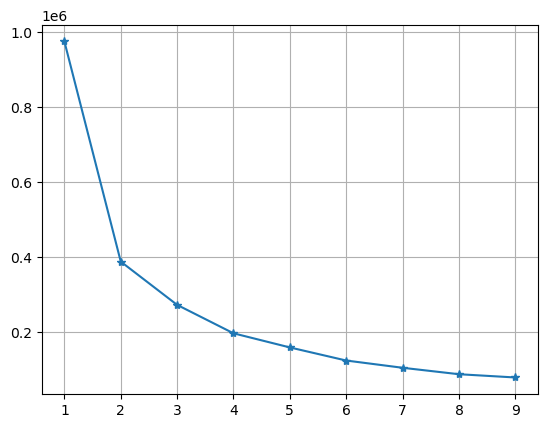

In [125]:
plt.plot(cluster_num,lst, marker ="*")
plt.grid()

In [126]:
lst

array([975512., 387066., 271385., 195401., 157621., 122608., 103233.,
        86004.,  77299.])

In [127]:
(975512 - 387066)*100/975512 #60% drop in ssd when k change from 1 to 2
(387066 - 271397)*100/387066 #29% drop in ssd when k change from 1 to 2
(271397 - 195401)*100/271397 #28% drop in ssd when k change from 1 to 2
(195401 - 157506)*100/195401 #19% drop in ssd when k change from 1 to 2
(157506 - 122630)*100/195401 #17% drop in ssd when k change from 1 to 2

17.848424521880645

In [128]:
(387066 - 271397)*100/387066

29.88353407429224

In [129]:
(271397 - 195401)*100/271397

28.001783365328283

In [130]:
(195401 - 157506)*100/195401

19.393452438830916

In [131]:
colormap = np.array(['Red','Green','Blue','Yellow','Black'])

In [140]:
kmeans_ml.labels_

array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3])

In [139]:
colormap[kmeans_ml.labels_]

array(['Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black',
       'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black',
       'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black',
       'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black',
       'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black',
       'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Black', 'Blue', 'Blue',
       'Blue', 'Blue', 'Blue', 'Black', 'Blue', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Red', 'Blue', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red',
       'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 'Red', 

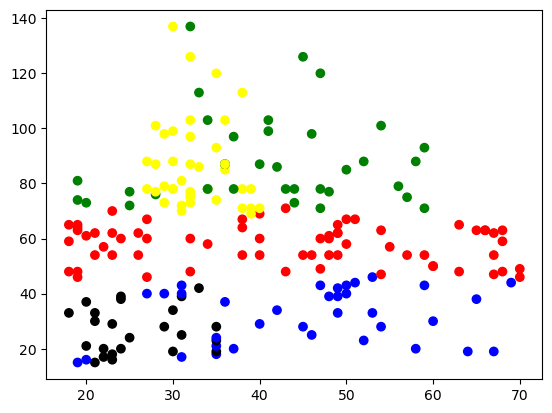

In [133]:
plt.scatter(ml['Age'],ml['Annual Income (k$)'], c = colormap[kmeans_ml.labels_])                     

In [134]:
ml

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Text(0, 0.5, 'Spending Score')

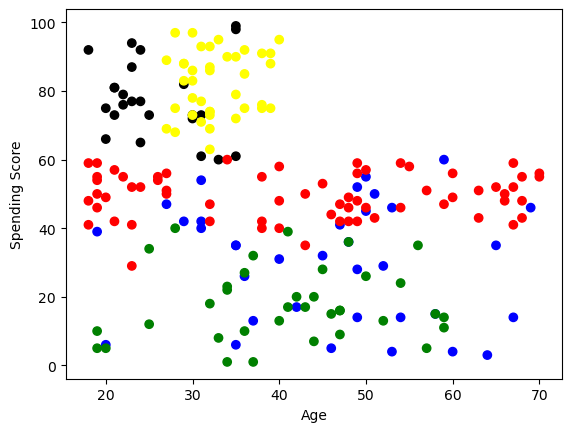

In [136]:
plt.scatter(ml['Age'],ml['Spending Score (1-100)'], c = colormap[kmeans_ml.labels_]) 
plt.xlabel('Age')
plt.ylabel('Spending Score')

Text(0, 0.5, 'Spending Score')

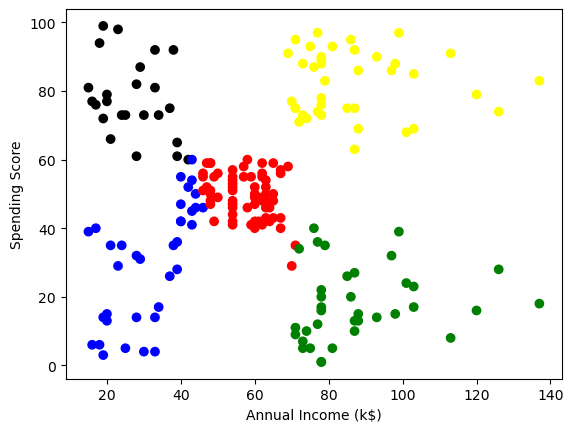

In [137]:
plt.scatter(ml['Annual Income (k$)'],ml['Spending Score (1-100)'], c = colormap[kmeans_ml.labels_]) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')